In [4]:
from google.colab import drive, auth
auth.authenticate_user()
drive.mount('./drive', force_remount=True, timeout_ms=300000)

Mounted at ./drive


In [5]:
!cp -r './drive/MyDrive/TI6/train' './train'

In [1]:
import numpy as np
import os
import cv2
import random
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

from keras.callbacks import ModelCheckpoint, EarlyStopping

import time

In [2]:
data_path = './train'

In [3]:
train_data = []
val_data = []

for folder in os.listdir(data_path):
    folder_path = os.path.join(data_path, folder)
    file = os.listdir(folder_path)

    numfile_used = int(0.8 * len(file))
    file_used = random.sample(file, numfile_used)

    num_train = int(0.85 * len(file_used))
    files_train = random.sample(file_used, num_train)
    files_val = list(set(file_used) - set(files_train))

    for file in files_train:
        file_path = os.path.join(folder_path, file)
        img = cv2.imread(file_path)
        img = cv2.resize(img, (224, 224))
        train_data.append((img, folder))

    for file in files_val:
        file_path = os.path.join(folder_path, file)
        img = cv2.imread(file_path)
        img = cv2.resize(img, (224, 224))
        val_data.append((img, folder))

In [4]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [5]:
base_model.trainable = False

In [6]:
num_classes = 10
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(512, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

In [7]:
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
X_train, y_train = zip(*train_data)
X_val, y_val = zip(*val_data)

X_train = preprocess_input(np.array(X_train))
X_val = preprocess_input(np.array(X_val))

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_val_encoded = le.transform(y_val)

y_train_one_hot = to_categorical(y_train_encoded, num_classes)
y_val_one_hot = to_categorical(y_val_encoded, num_classes)

In [9]:
EPOCHS = 18
BATCH_SIZE = 64

start_time = time.time()
history = model.fit(X_train, y_train_one_hot, validation_data=(X_val, y_val_one_hot),
                   epochs = EPOCHS, batch_size=BATCH_SIZE)
end_time = time.time()

execution_time = end_time - start_time
print("Tempo de treinamento: ", execution_time, " segundos")

# Salvar o modelo treinado
model.save('./model_gpu_oficial.h5')
!cp -r './model_gpu_oficial.h5' './drive/MyDrive/TI6/modelo'

Epoch 1/18
80/80 [==============================] - 36s 316ms/step - loss: 1.9524 - accuracy: 0.3789 - val_loss: 1.5990 - val_accuracy: 0.4484
Epoch 2/18
80/80 [==============================] - 20s 247ms/step - loss: 1.3827 - accuracy: 0.5332 - val_loss: 1.5279 - val_accuracy: 0.5006
Epoch 3/18
80/80 [==============================] - 20s 250ms/step - loss: 1.1825 - accuracy: 0.6026 - val_loss: 1.5287 - val_accuracy: 0.5028
Epoch 4/18
80/80 [==============================] - 21s 257ms/step - loss: 1.0001 - accuracy: 0.6661 - val_loss: 1.4378 - val_accuracy: 0.5316
Epoch 5/18
80/80 [==============================] - 21s 263ms/step - loss: 0.8259 - accuracy: 0.7307 - val_loss: 1.4239 - val_accuracy: 0.5494
Epoch 6/18
80/80 [==============================] - 21s 258ms/step - loss: 0.6877 - accuracy: 0.7844 - val_loss: 1.3944 - val_accuracy: 0.5572
Epoch 7/18
80/80 [==============================] - 20s 256ms/step - loss: 0.5377 - accuracy: 0.8343 - val_loss: 1.4598 - val_accuracy: 0.5594

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


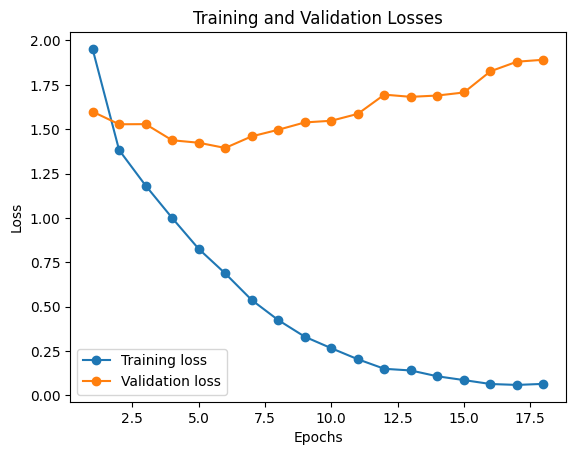

In [10]:
# Get the training and validation losses from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create an array representing the number of epochs
epochs = range(1, len(train_loss) + 1)

# Plot the training and validation losses
plt.plot(epochs, train_loss,label='Training loss', marker='o')
plt.plot(epochs, val_loss,label='Validation loss', marker='o')
plt.title('Training and Validation Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plot
plt.show()

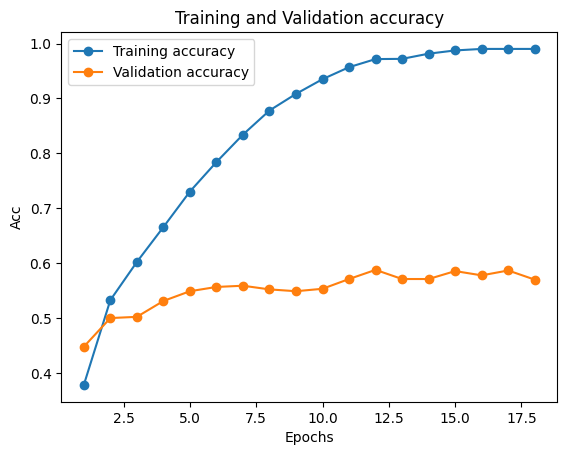

In [11]:
# Get the training and validation losses from the history object
train_loss = history.history['accuracy']
val_loss = history.history['val_accuracy']

# Create an array representing the number of epochs
epochs = range(1, len(train_loss) + 1)

# Plot the training and validation losses
plt.plot(epochs, train_loss,label='Training accuracy', marker='o')
plt.plot(epochs, val_loss,label='Validation accuracy', marker='o')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

# Show the plot
plt.show()